In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, PROJECT_ROOT)

from src.load_data import load_data


In [2]:
df = load_data("../data/DenkmallisteHamburg.xml")
print(df.head())
print(len(df))


                                                name description   latitude  \
0                 Pastorat der ehem. Stephanuskirche    Pastorat  53.581857   
1  Hafenbahn Altona, Hafenbahntunnel ("Schellfisc...      Tunnel  53.548898   
2  Hafenbahn Altona, Hafenbahntunnel ("Schellfisc...      Tunnel  53.548898   
3  Hafenbahn Altona, Hafenbahntunnel ("Schellfisc...      Tunnel  53.548898   
4  Hafenbahn Altona, Hafenbahntunnel ("Schellfisc...      Tunnel  53.548898   

   longitude    year  
0   9.943892  1912.0  
1   9.934495  1874.0  
2   9.934495  1874.0  
3   9.934495  1874.0  
4   9.934495  1874.0  
22541


In [3]:
df[["latitude", "longitude"]].describe()


,latitude,longitude
count,22541.000000,22541.000000
mean,53.571646,10.004924
std,0.168141,0.091617
min,29.412523,8.481946
25%,53.551337,9.955934
50%,53.568793,9.994528
75%,53.603149,10.053365
max,53.928889,10.302560


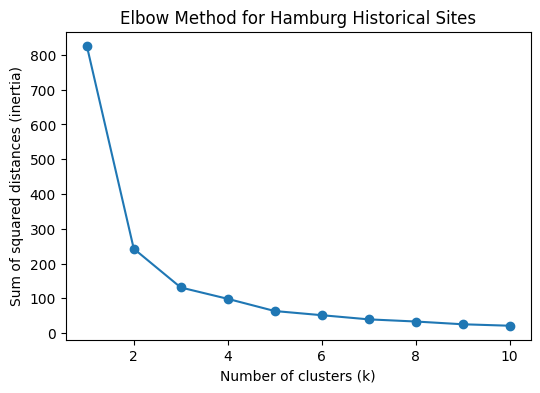

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

coords = df[["latitude", "longitude"]]

inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(coords)
    inertia.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of squared distances (inertia)")
plt.title("Elbow Method for Hamburg Historical Sites")
plt.show()


In [5]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(df[["latitude", "longitude"]])

df[["latitude", "longitude", "cluster"]].head()


,latitude,longitude,cluster
0,53.581857,9.943892,0
1,53.548898,9.934495,0
2,53.548898,9.934495,0
3,53.548898,9.934495,0
4,53.548898,9.934495,0


In [6]:
df["cluster"].value_counts()


cluster
0    12094
4     6807
2     2559
3     1080
1        1
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# remove rows without year
df_year = df.dropna(subset=["year"]).copy()

# scale year so it does not dominate distance
scaler = MinMaxScaler()
df_year["year_scaled"] = scaler.fit_transform(df_year[["year"]])

# cluster using space + time
coords_time = df_year[["latitude", "longitude", "year_scaled"]]
df_year["cluster_time"] = KMeans(n_clusters=5, random_state=42)\
    .fit_predict(coords_time)

df_year[["latitude", "longitude", "year", "cluster_time"]].head()


,latitude,longitude,year,cluster_time
0,53.581857,9.943892,1912.0,2
1,53.548898,9.934495,1874.0,2
2,53.548898,9.934495,1874.0,2
3,53.548898,9.934495,1874.0,2
4,53.548898,9.934495,1874.0,2
